In [2]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 10.3 MB/s eta 0:00:00


In [3]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
#df = pd.read_csv('/content/drive/MyDrive/HATE_SPEECH_DETECTION_PROJECT/DATASET/Clean_dataset.csv')

In [42]:
df = pd.read_csv('/content/drive/MyDrive/HATE_SPEECH_DETECTION_PROJECT/labelled_DATA_compiled/l_DATA.csv')

In [43]:
df

,Text,label,id
0,nah he pussy he won't,1,1
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2
2,` :Warriorboy85 has clarified that he did not...,0,3
3,` == English == Is ``shootdown`` a proper wo...,0,4
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5
...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264
94264,`Niggers and their liberal friends steal every...,1,94265
94265,Not into dressin' to impress these bitches or ...,1,94266
94266,:Replacement ref - 1UP archive not working? ...,0,94267


In [44]:
df.shape

(94268, 3)

In [45]:
df.drop_duplicates(subset=['Text'], inplace=True)

In [46]:
df.shape

(94268, 3)

In [47]:
num_nan_rows = df.isna().any(axis=1).sum()
print(num_nan_rows)

0


In [48]:
len(df[df['label'] == 0])

47098

In [49]:
len(df[df['label'] == 1])

47170

Downsampling of data

In [ ]:
#df_0 = df[df['label'] == 0].sample(50000, random_state=42)
#df_1 = df[df['label'] == 1].sample(50000, random_state=42)

In [ ]:
#df_0

In [ ]:
#df_1

In [ ]:
#df = pd.concat([df_0, df_1])

In [ ]:
#df=df.sample(frac=1, random_state=42)

In [ ]:
#df = df.reset_index(drop=True)

In [ ]:
#df = df.set_index(pd.Index(range(1, len(df)+1)))
#df['id'] = df.index

In [50]:
df

,Text,label,id
0,nah he pussy he won't,1,1
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2
2,` :Warriorboy85 has clarified that he did not...,0,3
3,` == English == Is ``shootdown`` a proper wo...,0,4
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5
...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264
94264,`Niggers and their liberal friends steal every...,1,94265
94265,Not into dressin' to impress these bitches or ...,1,94266
94266,:Replacement ref - 1UP archive not working? ...,0,94267


In [51]:
df['Text'] = df['Text'].str.replace('@', ' @')
df['Text'] = df['Text'].str.replace('#', ' #')

In [52]:
#Code to remove @
df['clean_Text'] = df['Text'].apply(lambda x : ' '.join([Text for Text in x.split()if not Text.startswith("@")]))

In [53]:
df

,Text,label,id,clean_Text
0,nah he pussy he won't,1,1,nah he pussy he won't
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,"` ::My dear Heresiarchess, - Me being the ``ma..."
2,` :Warriorboy85 has clarified that he did not...,0,3,` :Warriorboy85 has clarified that he did not ...
3,` == English == Is ``shootdown`` a proper wo...,0,4,` == English == Is ``shootdown`` a proper word...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,`} | width=``20%`` valign=``top`` | Archives _...
...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,", like nonconvex uniform polyhedron"
94264,`Niggers and their liberal friends steal every...,1,94265,`Niggers and their liberal friends steal every...
94265,Not into dressin' to impress these bitches or ...,1,94266,Not into dressin' to impress these bitches or ...
94266,:Replacement ref - 1UP archive not working? ...,0,94267,:Replacement ref - 1UP archive not working? |


In [54]:
df.head()

,Text,label,id,clean_Text
0,nah he pussy he won't,1,1,nah he pussy he won't
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,"` ::My dear Heresiarchess, - Me being the ``ma..."
2,` :Warriorboy85 has clarified that he did not...,0,3,` :Warriorboy85 has clarified that he did not ...
3,` == English == Is ``shootdown`` a proper wo...,0,4,` == English == Is ``shootdown`` a proper word...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,`} | width=``20%`` valign=``top`` | Archives _...


Checking for URLs in DATA and removing them

In [55]:
url_pattern = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
rows_with_urls = df[df['clean_Text'].str.contains(url_pattern)]
rows_with_urls

,Text,label,id,clean_Text
61,":Look at this, everybody is Celtic probably h...",0,62,":Look at this, everybody is Celtic probably ht..."
67,RT @theblaze: Before CNN refrained from showi...,0,68,RT Before CNN refrained from showing the Charl...
159,` == Los_Angeles_Pollution.jpg file in Rachel...,0,160,` == Los_Angeles_Pollution.jpg file in Rachel ...
175,` ::I suspected as much. But this object has a...,0,176,` ::I suspected as much. But this object has a...
206,:Looking at articles on other VNSAs (Violent ...,0,207,:Looking at articles on other VNSAs (Violent N...
...,...,...,...,...
94039,RT @ColeMcDowell2: I'm not sexist or anything...,1,94040,"RT I'm not sexist or anything by any means, bu..."
94164,@harun_yahya Yahya flips out about PKK being ...,1,94165,Yahya flips out about PKK being communists. Bu...
94191,RT @TRobinsonNewEra: http://t.co/M8N6EMK2u2 8...,1,94192,RT http://t.co/M8N6EMK2u2 8-year-old Yemeni ch...
94201,"To be fair, if you take a look at the talk pa...",0,94202,"To be fair, if you take a look at the talk pag..."


In [56]:
url_pattern2 = r'(https?://\S+)'
rows_with_urls2 = df[df['Text'].str.contains(url_pattern2)]
rows_with_urls2

,Text,label,id,clean_Text
61,":Look at this, everybody is Celtic probably h...",0,62,":Look at this, everybody is Celtic probably ht..."
67,RT @theblaze: Before CNN refrained from showi...,0,68,RT Before CNN refrained from showing the Charl...
159,` == Los_Angeles_Pollution.jpg file in Rachel...,0,160,` == Los_Angeles_Pollution.jpg file in Rachel ...
175,` ::I suspected as much. But this object has a...,0,176,` ::I suspected as much. But this object has a...
206,:Looking at articles on other VNSAs (Violent ...,0,207,:Looking at articles on other VNSAs (Violent N...
...,...,...,...,...
94039,RT @ColeMcDowell2: I'm not sexist or anything...,1,94040,"RT I'm not sexist or anything by any means, bu..."
94164,@harun_yahya Yahya flips out about PKK being ...,1,94165,Yahya flips out about PKK being communists. Bu...
94191,RT @TRobinsonNewEra: http://t.co/M8N6EMK2u2 8...,1,94192,RT http://t.co/M8N6EMK2u2 8-year-old Yemeni ch...
94201,"To be fair, if you take a look at the talk pa...",0,94202,"To be fair, if you take a look at the talk pag..."


In [57]:
url_pattern2 = r'(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*))'
rows_with_urls2 = df[df['Text'].str.contains(url_pattern2)]
rows_with_urls2

,Text,label,id,clean_Text
61,":Look at this, everybody is Celtic probably h...",0,62,":Look at this, everybody is Celtic probably ht..."
67,RT @theblaze: Before CNN refrained from showi...,0,68,RT Before CNN refrained from showing the Charl...
159,` == Los_Angeles_Pollution.jpg file in Rachel...,0,160,` == Los_Angeles_Pollution.jpg file in Rachel ...
175,` ::I suspected as much. But this object has a...,0,176,` ::I suspected as much. But this object has a...
206,:Looking at articles on other VNSAs (Violent ...,0,207,:Looking at articles on other VNSAs (Violent N...
...,...,...,...,...
94039,RT @ColeMcDowell2: I'm not sexist or anything...,1,94040,"RT I'm not sexist or anything by any means, bu..."
94164,@harun_yahya Yahya flips out about PKK being ...,1,94165,Yahya flips out about PKK being communists. Bu...
94191,RT @TRobinsonNewEra: http://t.co/M8N6EMK2u2 8...,1,94192,RT http://t.co/M8N6EMK2u2 8-year-old Yemeni ch...
94201,"To be fair, if you take a look at the talk pa...",0,94202,"To be fair, if you take a look at the talk pag..."


In [58]:
extra_URL = rows_with_urls2[~rows_with_urls2['id'].isin(rows_with_urls['id'])]
extra_URL

,Text,label,id,clean_Text
6193,Additions of http://.forexmarketnews.org Pl...,0,6194,Additions of http://.forexmarketnews.org Pleas...
8695,I don't think Wikipedia can speak for every si...,0,8696,I don't think Wikipedia can speak for every si...
23461,:There's a very reputable reference at http:...,0,23462,:There's a very reputable reference at http://...
25698,lmfaooo #girlfights #ghetto #ratchet ; bi...,1,25699,lmfaooo #girlfights #ghetto #ratchet ; bitch g...
29223,"Before covering up #IRS misdeeds, creepy litt...",1,29224,"Before covering up #IRS misdeeds, creepy littl..."
36782,"When bae calls ""Chinese food"" in your phone an...",1,36783,"When bae calls ""Chinese food"" in your phone an..."
41688,When lil b said Word around town that I aint g...,1,41689,When lil b said Word around town that I aint g...
43964,":What me know what I'm talking about, just co...",0,43965,":What me know what I'm talking about, just com..."
48938,` ==``Learn grammar first``== Unfortunately ...,1,48939,` ==``Learn grammar first``== Unfortunately yo...
57311,Additions of http://.brainstormer.com Please...,0,57312,Additions of http://.brainstormer.com Please d...


In [59]:
# Function to remove URLs from a string

url_pattern = re.compile(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')# Define URL regex pattern

def remove_urls(text):
    return url_pattern.sub('URL HERE', text)

# Apply function to 'text' column
df['clean_Text'] = df['clean_Text'].apply(remove_urls)

df

,Text,label,id,clean_Text
0,nah he pussy he won't,1,1,nah he pussy he won't
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,"` ::My dear Heresiarchess, - Me being the ``ma..."
2,` :Warriorboy85 has clarified that he did not...,0,3,` :Warriorboy85 has clarified that he did not ...
3,` == English == Is ``shootdown`` a proper wo...,0,4,` == English == Is ``shootdown`` a proper word...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,`} | width=``20%`` valign=``top`` | Archives _...
...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,", like nonconvex uniform polyhedron"
94264,`Niggers and their liberal friends steal every...,1,94265,`Niggers and their liberal friends steal every...
94265,Not into dressin' to impress these bitches or ...,1,94266,Not into dressin' to impress these bitches or ...
94266,:Replacement ref - 1UP archive not working? ...,0,94267,:Replacement ref - 1UP archive not working? |


In [60]:
url_pattern = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
rows_with_urls = df[df['clean_Text'].str.contains(url_pattern)]
rows_with_urls

,Text,label,id,clean_Text


In [61]:
(df[df['clean_Text'].str.contains('URL HERE')])

,Text,label,id,clean_Text
61,":Look at this, everybody is Celtic probably h...",0,62,":Look at this, everybody is Celtic probably UR..."
67,RT @theblaze: Before CNN refrained from showi...,0,68,RT Before CNN refrained from showing the Charl...
159,` == Los_Angeles_Pollution.jpg file in Rachel...,0,160,` == Los_Angeles_Pollution.jpg file in Rachel ...
175,` ::I suspected as much. But this object has a...,0,176,` ::I suspected as much. But this object has a...
206,:Looking at articles on other VNSAs (Violent ...,0,207,:Looking at articles on other VNSAs (Violent N...
...,...,...,...,...
94039,RT @ColeMcDowell2: I'm not sexist or anything...,1,94040,"RT I'm not sexist or anything by any means, bu..."
94164,@harun_yahya Yahya flips out about PKK being ...,1,94165,Yahya flips out about PKK being communists. Bu...
94191,RT @TRobinsonNewEra: http://t.co/M8N6EMK2u2 8...,1,94192,RT URL HERE 8-year-old Yemeni child dies at ha...
94201,"To be fair, if you take a look at the talk pa...",0,94202,"To be fair, if you take a look at the talk pag..."


Removing numbers

In [62]:
#Removing numbers
df['clean_Text'] = df['clean_Text'].apply(lambda x : ' '.join([Text for Text in x.split() if not Text == '\d*']))

In [63]:
df['clean_Text'] = df['clean_Text'].apply(lambda x: ''.join(char for char in x if not char.isnumeric()))

In [64]:
df.head(10)

,Text,label,id,clean_Text
0,nah he pussy he won't,1,1,nah he pussy he won't
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,"` ::My dear Heresiarchess, - Me being the ``ma..."
2,` :Warriorboy85 has clarified that he did not...,0,3,` :Warriorboy has clarified that he did not in...
3,` == English == Is ``shootdown`` a proper wo...,0,4,` == English == Is ``shootdown`` a proper word...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,`} | width=``%`` valign=``top`` | Archives __T...
5,` :I have reverted this move. The discussion ...,0,6,` :I have reverted this move. The discussion w...
6,== Image:Josh_hutcherson.jpg listed for dele...,0,7,== Image:Josh_hutcherson.jpg listed for deleti...
7,Bum bitch won't even my type,1,8,Bum bitch won't even my type
8,"I know Eagles is NOT guilty of this, but oth...",0,9,"I know Eagles is NOT guilty of this, but other..."
9,"|royalty-work-group=yes |listas=Juan, Infante...",0,10,"|royalty-work-group=yes |listas=Juan, Infante,..."


In [65]:
#Removing all the greek characters using unidecode library
df['clean_Text'] = df['clean_Text'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 

In [66]:
df.head(10)

,Text,label,id,clean_Text
0,nah he pussy he won't,1,1,nah he pussy he won't
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,"` ::My dear Heresiarchess, - Me being the ``ma..."
2,` :Warriorboy85 has clarified that he did not...,0,3,` :Warriorboy has clarified that he did not in...
3,` == English == Is ``shootdown`` a proper wo...,0,4,` == English == Is ``shootdown`` a proper word...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,`} | width=``%`` valign=``top`` | Archives __T...
5,` :I have reverted this move. The discussion ...,0,6,` :I have reverted this move. The discussion w...
6,== Image:Josh_hutcherson.jpg listed for dele...,0,7,== Image:Josh_hutcherson.jpg listed for deleti...
7,Bum bitch won't even my type,1,8,Bum bitch won't even my type
8,"I know Eagles is NOT guilty of this, but oth...",0,9,"I know Eagles is NOT guilty of this, but other..."
9,"|royalty-work-group=yes |listas=Juan, Infante...",0,10,"|royalty-work-group=yes |listas=Juan, Infante,..."


In [67]:
df.values

array([["nah he pussy he won't", 1, 1, "nah he pussy he won't"],
       ["`  ::My dear Heresiarchess, - Me being the ``main cause`` for your schism? That was never raised before today, but I am not surprised given your track record. You honor me greatly. As for liabilities, you could try considering raising a brood of convicted paedophiles as a liability if you were normal, but then you must be considering that a vreat achievement. Happy Mother's day to you! - LJM   `",
        0, 2,
        "` ::My dear Heresiarchess, - Me being the ``main cause`` for your schism? That was never raised before today, but I am not surprised given your track record. You honor me greatly. As for liabilities, you could try considering raising a brood of convicted paedophiles as a liability if you were normal, but then you must be considering that a vreat achievement. Happy Mother's day to you! - LJM `"],
       ['`  :Warriorboy85 has clarified that he did not intend his comments as a threat, but rather tha

In [68]:
df

,Text,label,id,clean_Text
0,nah he pussy he won't,1,1,nah he pussy he won't
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,"` ::My dear Heresiarchess, - Me being the ``ma..."
2,` :Warriorboy85 has clarified that he did not...,0,3,` :Warriorboy has clarified that he did not in...
3,` == English == Is ``shootdown`` a proper wo...,0,4,` == English == Is ``shootdown`` a proper word...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,`} | width=``%`` valign=``top`` | Archives __T...
...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,", like nonconvex uniform polyhedron"
94264,`Niggers and their liberal friends steal every...,1,94265,`Niggers and their liberal friends steal every...
94265,Not into dressin' to impress these bitches or ...,1,94266,Not into dressin' to impress these bitches or ...
94266,:Replacement ref - 1UP archive not working? ...,0,94267,:Replacement ref - UP archive not working? |


In [69]:
#Finding words with # attached to it
df['#'] = df['clean_Text'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [70]:
df

,Text,label,id,clean_Text,#
0,nah he pussy he won't,1,1,nah he pussy he won't,
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,"` ::My dear Heresiarchess, - Me being the ``ma...",
2,` :Warriorboy85 has clarified that he did not...,0,3,` :Warriorboy has clarified that he did not in...,
3,` == English == Is ``shootdown`` a proper wo...,0,4,` == English == Is ``shootdown`` a proper word...,
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,`} | width=``%`` valign=``top`` | Archives __T...,
...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,", like nonconvex uniform polyhedron",
94264,`Niggers and their liberal friends steal every...,1,94265,`Niggers and their liberal friends steal every...,
94265,Not into dressin' to impress these bitches or ...,1,94266,Not into dressin' to impress these bitches or ...,
94266,:Replacement ref - 1UP archive not working? ...,0,94267,:Replacement ref - UP archive not working? |,


Removing all non AlphaNumeric characters.

In [71]:
df['clean_Text'] = df['clean_Text'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))

In [ ]:
# Apply the lambda function to remove whitespace and ',' from the end of each sentence
#df['clean_Text'] = df['clean_Text'].apply(lambda x: re.sub(r'[\s,]+$', '', x))

In [ ]:
# Apply the lambda function to add a full stop at the end of each sentence
#df['clean_Text'] = df['clean_Text'].apply(lambda x: x.rstrip('.?!') + '.' if x and x[-1] not in ['.', '?', '!'] else x)

In [ ]:
# Apply the lambda function to remove anything at the start of each sentence if it is not a letter
#df['clean_Text'] = df['clean_Text'].apply(lambda x: re.sub(r'^(?!\w)[^\w\s]*', '', x))

In [72]:
df

,Text,label,id,clean_Text,#
0,nah he pussy he won't,1,1,nah he pussy he wont,
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me being the main caus...,
2,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy has clarified that he did not inte...,
3,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown a proper word Better q...,
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,
...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,like nonconvex uniform polyhedron,
94264,`Niggers and their liberal friends steal every...,1,94265,Niggers and their liberal friends steal everyt...,
94265,Not into dressin' to impress these bitches or ...,1,94266,Not into dressin to impress these bitches or n...,
94266,:Replacement ref - 1UP archive not working? ...,0,94267,Replacement ref UP archive not working,


In [73]:
df.head(10)

,Text,label,id,clean_Text,#
0,nah he pussy he won't,1,1,nah he pussy he wont,
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me being the main caus...,
2,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy has clarified that he did not inte...,
3,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown a proper word Better q...,
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,
5,` :I have reverted this move. The discussion ...,0,6,I have reverted this move The discussion was ...,
6,== Image:Josh_hutcherson.jpg listed for dele...,0,7,ImageJoshhutchersonjpg listed for deletion A...,
7,Bum bitch won't even my type,1,8,Bum bitch wont even my type,
8,"I know Eagles is NOT guilty of this, but oth...",0,9,I know Eagles is NOT guilty of this but other ...,
9,"|royalty-work-group=yes |listas=Juan, Infante...",0,10,royaltyworkgroupyes listasJuan Infante Count o...,


In [74]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food','AFAIK':'As Far As I Know',
'AFK':'Away From Keyboard',
'ASAP':'As Soon As Possible',
'ATK':'At The Keyboard',
'ATM':'At The Moment',
'A3':'Anytime, Anywhere, Anyplace',
'BAK':'Back At Keyboard',
'BBL':'Be Back Later',
'BBS':'Be Back Soon',
'BFN':'Bye For Now',
'B4N':'Bye For Now',
'BRB':'Be Right Back',
'BRT':'Be Right There',
'BTW':'By The Way',
'B4':'Before',
'B4N':'Bye For Now',
'CU':'See You',
'CUL8R':'See You Later',
'CYA':'See You',
'FAQ':'Frequently Asked Questions',
'FC':'Fingers Crossed',
'FWIW':'For What Its Worth',
'FYI':'For Your Information',
'GAL':'Get A Life',
'GG':'Good Game',
'GN':'Good Night',
'GMTA':'Great Minds Think Alike',
'GR8':'Great!',
'G9':'Genius',
'IC':'I See',
'ICQ':'I Seek you (also a chat program)',
'ILU':' I Love You',
'IMHO':'In My Honest/Humble Opinion',
'IMO':'In My Opinion',
'IOW':'In Other Words',
'IRL':'In Real Life',
'KISS':'Keep It Simple, Stupid',
'LDR':'Long Distance Relationship',
'LMAO':'Laugh My Ass Off',
'LOL':'Laughing Out Loud',
'LTNS':'Long Time No See',
'L8R':'Later',
'MTE':'My Thoughts Exactly',
'M8':'Mate',
'NRN':'No Reply Necessary',
'OIC':'Oh I See',
'PITA':'Pain In The Ass',
'PRT':'Party',
'PRW':'Parents Are Watching',
'ROFL':'Rolling On The Floor Laughing',
'ROFLOL':'Rolling On The Floor Laughing Out Loud',
'ROTFLMAO':'Rolling On The Floor Laughing My Ass Off',
'SK8':'Skate',
'STATS':'Your sex and age',
'ASL':'Age, Sex, Location',
'THX':'Thank You',
'TTFN':'Ta-Ta For Now!',
'TTYL':'Talk To You Later',
'U':'You',
'U2':'You Too',
'U4E':'Yours For Ever',
'WB':'Welcome Back',
'WTF':'What The Fuck',
'WTG':'Way To Go!',
'WUF':'Where Are You From?',
'W8':'Wait',
'7K':'Sick:-D Laugh',} ## Need a huge dictionary

In [75]:
d = {k.upper(): v for k, v in d.items()}

In [76]:
d

{'LUV': 'love',
 'WUD': 'would',
 'LYK': 'like',
 'WATEVA': 'whatever',
 'TTYL': 'Talk To You Later',
 'KUL': 'cool',
 'FYN': 'fine',
 'OMG': 'oh my god!',
 'FAM': 'family',
 'BRUH': 'brother',
 'CUD': 'could',
 'FUD': 'food',
 'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': 'For What Its Worth',
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great!',
 'G9': 'Genius',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat prog

In [77]:
words = "I LUV myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [78]:
reformed

'I love myself'

In [79]:
#Removing the word 'hmm' and it's variants
df['clean_Text'] = df['clean_Text'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))

In [80]:
# Function to replace short forms with long forms
def replace_short_forms(text):
    words = []
    for word in text.split():
        if word.upper() in d:
            words.append(d[word.upper()])
        else:
            words.append(word)
    return ' '.join(words)

# Apply function to 'Text' column
df['ABB_clean_Text'] = df['clean_Text'].apply(replace_short_forms)

In [81]:
df

,Text,label,id,clean_Text,#,ABB_clean_Text
0,nah he pussy he won't,1,1,nah he pussy he wont,,nah he pussy he wont
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me being the main cause ...,,My dear Heresiarchess Me being the main cause ...
2,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy has clarified that he did not inten...,,Warriorboy has clarified that he did not inten...
3,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown a proper word Better ques...,,English Is shootdown a proper word Better ques...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,,width valigntop Archives TOC
...,...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,like nonconvex uniform polyhedron,,like nonconvex uniform polyhedron
94264,`Niggers and their liberal friends steal every...,1,94265,Niggers and their liberal friends steal everyt...,,Niggers and their liberal friends steal everyt...
94265,Not into dressin' to impress these bitches or ...,1,94266,Not into dressin to impress these bitches or n...,,Not into dressin to impress these bitches or n...
94266,:Replacement ref - 1UP archive not working? ...,0,94267,Replacement ref UP archive not working,,Replacement ref UP archive not working


In [82]:
df[df['clean_Text'] != df['ABB_clean_Text']]

,Text,label,id,clean_Text,#,ABB_clean_Text
16,when bitches be tryna wash their shit on the l...,1,17,when bitches be tryna wash their shit on the l...,,when bitches be tryna wash their shit on the l...
69,"` :::CPL, I'd like to review the Chessmetrics...",0,70,CPL Id like to review the Chessmetrics discuss...,,CPL Id like to review the Chessmetrics discuss...
76,Lmfaooooo &gt; Lmaoo Thats what u got from thi...,1,77,Lmfaooooo gt Lmaoo Thats what u got from this ...,,Lmfaooooo gt Lmaoo Thats what You got from thi...
98,{{unblock|i said im sorry......how do u expec...,0,99,unblocki said im sorryhow do u expect me to st...,,unblocki said im sorryhow do You expect me to ...
118,thats freaky how you knew i was Latino no i do...,0,119,thats freaky how you knew i was Latino no i do...,,thats freaky how you knew i was Latino no i do...
...,...,...,...,...,...,...
94166,What the fuck are you talking about? I didn'...,1,94167,What the fuck are you talking about I didnt ri...,,What the fuck are you talking about I didnt ri...
94179,U hella gay u never did quit subbing fag,1,94180,U hella gay u never did quit subbing fag,,You hella gay You never did quit subbing fag
94210,lol its #hoe bitch ass,1,94211,lol its hoe bitch ass,#hoe,Laughing Out Loud its hoe bitch ass
94213,These side bitches will wait til they know u w...,1,94214,These side bitches will wait til they know u w...,,These side bitches will wait til they know You...


In [83]:
df = df.drop('clean_Text', axis=1)
df

,Text,label,id,#,ABB_clean_Text
0,nah he pussy he won't,1,1,,nah he pussy he wont
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,,My dear Heresiarchess Me being the main cause ...
2,` :Warriorboy85 has clarified that he did not...,0,3,,Warriorboy has clarified that he did not inten...
3,` == English == Is ``shootdown`` a proper wo...,0,4,,English Is shootdown a proper word Better ques...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,,width valigntop Archives TOC
...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,,like nonconvex uniform polyhedron
94264,`Niggers and their liberal friends steal every...,1,94265,,Niggers and their liberal friends steal everyt...
94265,Not into dressin' to impress these bitches or ...,1,94266,,Not into dressin to impress these bitches or n...
94266,:Replacement ref - 1UP archive not working? ...,0,94267,,Replacement ref UP archive not working


In [84]:
df = df.rename(columns={'ABB_clean_Text': 'clean_Text'})
df

,Text,label,id,#,clean_Text
0,nah he pussy he won't,1,1,,nah he pussy he wont
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,,My dear Heresiarchess Me being the main cause ...
2,` :Warriorboy85 has clarified that he did not...,0,3,,Warriorboy has clarified that he did not inten...
3,` == English == Is ``shootdown`` a proper wo...,0,4,,English Is shootdown a proper word Better ques...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,,width valigntop Archives TOC
...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,,like nonconvex uniform polyhedron
94264,`Niggers and their liberal friends steal every...,1,94265,,Niggers and their liberal friends steal everyt...
94265,Not into dressin' to impress these bitches or ...,1,94266,,Not into dressin to impress these bitches or n...
94266,:Replacement ref - 1UP archive not working? ...,0,94267,,Replacement ref UP archive not working


In [85]:
frame = df['#']

In [86]:
frame.head()

0    
1    
2    
3    
4    
Name: #, dtype: object

In [87]:
type(frame)

pandas.core.series.Series

In [88]:
frame = pd.DataFrame(frame)

In [89]:
frame = frame.rename({'#':'Count(#)'},axis = 'columns')

In [90]:
frame.head()

,Count(#)
0,
1,
2,
3,
4,


In [91]:
frame[frame['Count(#)'] == ''] = 'No hashtags'

In [92]:
frame.head()

,Count(#)
0,No hashtags
1,No hashtags
2,No hashtags
3,No hashtags
4,No hashtags


In [93]:
df.head()

,Text,label,id,#,clean_Text
0,nah he pussy he won't,1,1,,nah he pussy he wont
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,,My dear Heresiarchess Me being the main cause ...
2,` :Warriorboy85 has clarified that he did not...,0,3,,Warriorboy has clarified that he did not inten...
3,` == English == Is ``shootdown`` a proper wo...,0,4,,English Is shootdown a proper word Better ques...
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,,width valigntop Archives TOC


In [94]:
data_frame = pd.concat([df,frame],axis = 1)

In [95]:
data_frame.head(10)

,Text,label,id,#,clean_Text,Count(#)
0,nah he pussy he won't,1,1,,nah he pussy he wont,No hashtags
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,,My dear Heresiarchess Me being the main cause ...,No hashtags
2,` :Warriorboy85 has clarified that he did not...,0,3,,Warriorboy has clarified that he did not inten...,No hashtags
3,` == English == Is ``shootdown`` a proper wo...,0,4,,English Is shootdown a proper word Better ques...,No hashtags
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,,width valigntop Archives TOC,No hashtags
5,` :I have reverted this move. The discussion ...,0,6,,I have reverted this move The discussion was n...,No hashtags
6,== Image:Josh_hutcherson.jpg listed for dele...,0,7,,ImageJoshhutchersonjpg listed for deletion An ...,No hashtags
7,Bum bitch won't even my type,1,8,,Bum bitch wont even my type,No hashtags
8,"I know Eagles is NOT guilty of this, but oth...",0,9,,I know Eagles is NOT guilty of this but other ...,No hashtags
9,"|royalty-work-group=yes |listas=Juan, Infante...",0,10,,royaltyworkgroupyes listasJuan Infante Count o...,No hashtags


In [96]:
data_frame.drop('#',axis = 1,inplace = True)

In [97]:
data_frame

,Text,label,id,clean_Text,Count(#)
0,nah he pussy he won't,1,1,nah he pussy he wont,No hashtags
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me being the main cause ...,No hashtags
2,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy has clarified that he did not inten...,No hashtags
3,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown a proper word Better ques...,No hashtags
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,like nonconvex uniform polyhedron,No hashtags
94264,`Niggers and their liberal friends steal every...,1,94265,Niggers and their liberal friends steal everyt...,No hashtags
94265,Not into dressin' to impress these bitches or ...,1,94266,Not into dressin to impress these bitches or n...,No hashtags
94266,:Replacement ref - 1UP archive not working? ...,0,94267,Replacement ref UP archive not working,No hashtags


In [98]:
#Column showing whether the corresponding tweet has a hash tagged word or not
data_frame = data_frame.rename({'Count(#)':'Hash words'},axis = 'columns')

In [99]:
data_frame

,Text,label,id,clean_Text,Hash words
0,nah he pussy he won't,1,1,nah he pussy he wont,No hashtags
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me being the main cause ...,No hashtags
2,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy has clarified that he did not inten...,No hashtags
3,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown a proper word Better ques...,No hashtags
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,like nonconvex uniform polyhedron,No hashtags
94264,`Niggers and their liberal friends steal every...,1,94265,Niggers and their liberal friends steal everyt...,No hashtags
94265,Not into dressin' to impress these bitches or ...,1,94266,Not into dressin to impress these bitches or n...,No hashtags
94266,:Replacement ref - 1UP archive not working? ...,0,94267,Replacement ref UP archive not working,No hashtags


In [100]:
data_frame[~data_frame['Hash words'].str.contains('No hashtags')]

,Text,label,id,clean_Text,Hash words
26,#11 get to hit any bitch on campus he wants to,1,27,get to hit any bitch on campus he wants to,#
40,"RT @FakeToniaTodman: If Kat stays, we can wat...",1,41,RT If Kat stays we can watch her descent into ...,#mkr
46,Can't decide if I dislike the 'promo' girls mo...,0,47,Cant decide if I dislike the promo girls more ...,#mkr #MKR
48,RT @Former_legend: That kitchen looks like th...,1,49,RT That kitchen looks like theyve reenacted Gi...,#MKR
56,the face i pull after a long days work when i ...,0,57,the face i pull after a long days work when i ...,#high
...,...,...,...,...,...
94210,lol its #hoe bitch ass,1,94211,Laughing Out Loud its hoe bitch ass,#hoe
94211,"""Do you think the other teams are going to pic...",1,94212,Do you think the other teams are going to pick...,#MKR
94224,Kat I'd love to slap your face with a pork cut...,1,94225,Kat Id love to slap your face with a pork cutl...,#MKR
94241,#totellthetruth everytime i sta to love a ac...,0,94242,totellthetruth everytime i sta to love a actor...,#totellthetruth


In [101]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    """
    A function that removes stopwords from a string of text
    """
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data_frame['clean_Text'] = data_frame['clean_Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [102]:
data_frame

,Text,label,id,clean_Text,Hash words
0,nah he pussy he won't,1,1,nah pussy wont,No hashtags
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me main cause schism Tha...,No hashtags
2,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy clarified intend comments threat ra...,No hashtags
3,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown proper word Better questi...,No hashtags
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,like nonconvex uniform polyhedron,No hashtags
94264,`Niggers and their liberal friends steal every...,1,94265,Niggers liberal friends steal everything tied ...,No hashtags
94265,Not into dressin' to impress these bitches or ...,1,94266,Not dressin impress bitches niggas,No hashtags
94266,:Replacement ref - 1UP archive not working? ...,0,94267,Replacement ref UP archive working,No hashtags


In [103]:
#Removing consecutive duplicate words

def remove_consecutive_duplicates(text):
    words = text.split()
    filtered_words = [word for i, word in enumerate(words) if i == 0 or word != words[i-1]]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

data_frame['clean_Text'] = data_frame['clean_Text'].apply(remove_consecutive_duplicates)

In [104]:
data_frame

,Text,label,id,clean_Text,Hash words
0,nah he pussy he won't,1,1,nah pussy wont,No hashtags
1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me main cause schism Tha...,No hashtags
2,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy clarified intend comments threat ra...,No hashtags
3,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown proper word Better questi...,No hashtags
4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
...,...,...,...,...,...
94263,", like nonconvex uniform polyhedron",0,94264,like nonconvex uniform polyhedron,No hashtags
94264,`Niggers and their liberal friends steal every...,1,94265,Niggers liberal friends steal everything tied ...,No hashtags
94265,Not into dressin' to impress these bitches or ...,1,94266,Not dressin impress bitches niggas,No hashtags
94266,:Replacement ref - 1UP archive not working? ...,0,94267,Replacement ref UP archive working,No hashtags


In [105]:
data_frame.to_csv('/content/drive/MyDrive/HATE_SPEECH_DETECTION_PROJECT/DATASET/Clean_dataset_2.csv')

In [106]:
data_frame = pd.read_csv('/content/drive/MyDrive/HATE_SPEECH_DETECTION_PROJECT/DATASET/Clean_dataset_2.csv')

In [107]:
num_nan_rows = data_frame.isna().any(axis=1).sum()
print(num_nan_rows)

31


In [108]:
data_frame = data_frame.dropna()

In [109]:
data_frame

,Unnamed: 0,Text,label,id,clean_Text,Hash words
0,0,nah he pussy he won't,1,1,nah pussy wont,No hashtags
1,1,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me main cause schism Tha...,No hashtags
2,2,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy clarified intend comments threat ra...,No hashtags
3,3,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown proper word Better questi...,No hashtags
4,4,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
...,...,...,...,...,...,...
94263,94263,", like nonconvex uniform polyhedron",0,94264,like nonconvex uniform polyhedron,No hashtags
94264,94264,`Niggers and their liberal friends steal every...,1,94265,Niggers liberal friends steal everything tied ...,No hashtags
94265,94265,Not into dressin' to impress these bitches or ...,1,94266,Not dressin impress bitches niggas,No hashtags
94266,94266,:Replacement ref - 1UP archive not working? ...,0,94267,Replacement ref UP archive working,No hashtags


In [110]:
data_frame = data_frame.reset_index(drop=True)

In [111]:
data_frame = data_frame.set_index(pd.Index(range(1, len(data_frame)+1)))
data_frame['id'] = data_frame.index

In [112]:
data_frame = data_frame.drop('Unnamed: 0',axis=1)

In [113]:
data_frame

,Text,label,id,clean_Text,Hash words
1,nah he pussy he won't,1,1,nah pussy wont,No hashtags
2,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me main cause schism Tha...,No hashtags
3,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy clarified intend comments threat ra...,No hashtags
4,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown proper word Better questi...,No hashtags
5,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
...,...,...,...,...,...
94233,", like nonconvex uniform polyhedron",0,94233,like nonconvex uniform polyhedron,No hashtags
94234,`Niggers and their liberal friends steal every...,1,94234,Niggers liberal friends steal everything tied ...,No hashtags
94235,Not into dressin' to impress these bitches or ...,1,94235,Not dressin impress bitches niggas,No hashtags
94236,:Replacement ref - 1UP archive not working? ...,0,94236,Replacement ref UP archive working,No hashtags


In [ ]:
#data_frame.to_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Clean_dataset_for_EMBEDDING.csv')

In [ ]:
#data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Clean_dataset_for_EMBEDDING.csv')

In [ ]:
#num_nan_rows = data_frame.isna().any(axis=1).sum()
#print(num_nan_rows)

0


In [ ]:
#Continue Here

In [114]:
#Lemmitization
import nltk
from nltk.stem import WordNetLemmatizer

#download necessary nltk resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
#initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

#define a function to lemmatize a single word
def lemmatize_word(word):
    return lemmatizer.lemmatize(word)

#define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    return ' '.join([lemmatize_word(word) for word in nltk.word_tokenize(sentence)])

#apply the lemmatize_sentence function to each row in the dataframe
data_frame['clean_Text'] = data_frame['clean_Text'].apply(lemmatize_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [115]:
data_frame.head(20)

,Text,label,id,clean_Text,Hash words
1,nah he pussy he won't,1,1,nah pussy wont,No hashtags
2,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me main cause schism Tha...,No hashtags
3,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy clarified intend comment threat rat...,No hashtags
4,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown proper word Better questi...,No hashtags
5,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
6,` :I have reverted this move. The discussion ...,0,6,I reverted move The discussion announced artic...,No hashtags
7,== Image:Josh_hutcherson.jpg listed for dele...,0,7,ImageJoshhutchersonjpg listed deletion An imag...,No hashtags
8,Bum bitch won't even my type,1,8,Bum bitch wont even type,No hashtags
9,"I know Eagles is NOT guilty of this, but oth...",0,9,I know Eagles NOT guilty user guilty,No hashtags
10,"|royalty-work-group=yes |listas=Juan, Infante...",0,10,royaltyworkgroupyes listasJuan Infante Count B...,No hashtags


In [ ]:
data_len = data_frame.shape[0]
print(data_len)

94250


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
corpus = []
for i in range(1, data_len):
    Text = data_frame['clean_Text'][i]
    Text = Text.lower()
    Text = Text.split()
    Text = [word for word in Text if not word in set(stopwords.words('english'))]
    Text = ' '.join(Text)
    corpus.append(Text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus

['nah pussy wont .',
 'dear heresiarchess , main cause schism ? never raised today , surprised given track record . honor greatly . liability , could try considering raising brood convicted paedophile liability normal , must considering vreat achievement . happy mothers day ! ljm .',
 'warriorboy clarified intend comment threat , rather contact allied discus matter . apologized .',
 'english shootdown proper word ? better question , deliberate act class accident ?',
 'width valigntop archives toc .',
 'reverted move . discussion announced article , regular contributor idea happening . check archive , youll see nonconsensus move past , extensive discussion without consensus . , current name may great , im going defend cost , name bbc originally used episode , name article created . weve suggestion changing row suggestion changing telephone suggests brand mentioned . far weve consensus . im happy move , discussion talk page consensus moved . rm really place discus renaming active article

In [116]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Normal words


(-0.5, 799.5, 499.5, -0.5)

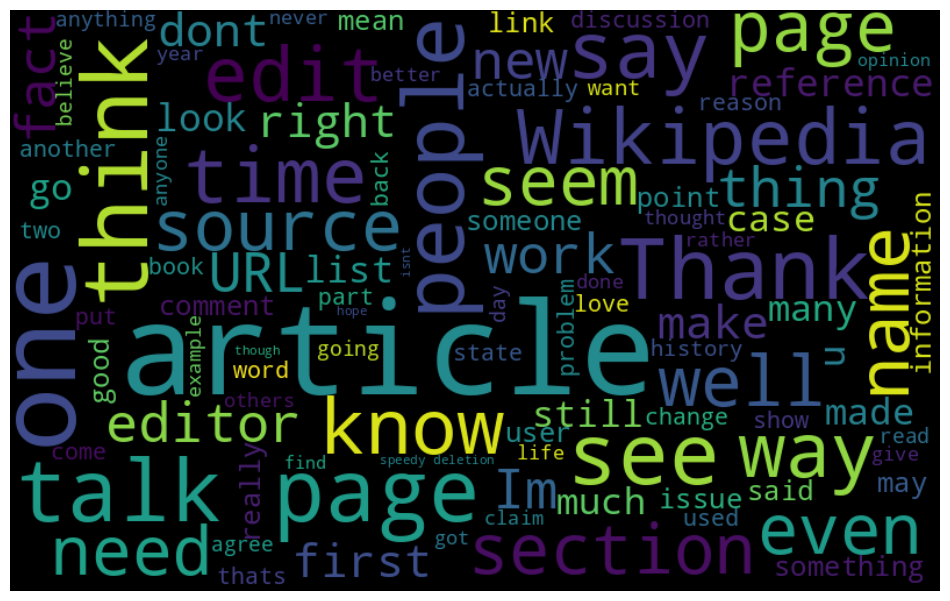

In [117]:
normal_words0 = ' '.join([word for word in data_frame['clean_Text'][data_frame['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words0)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Hate words


(-0.5, 799.5, 499.5, -0.5)

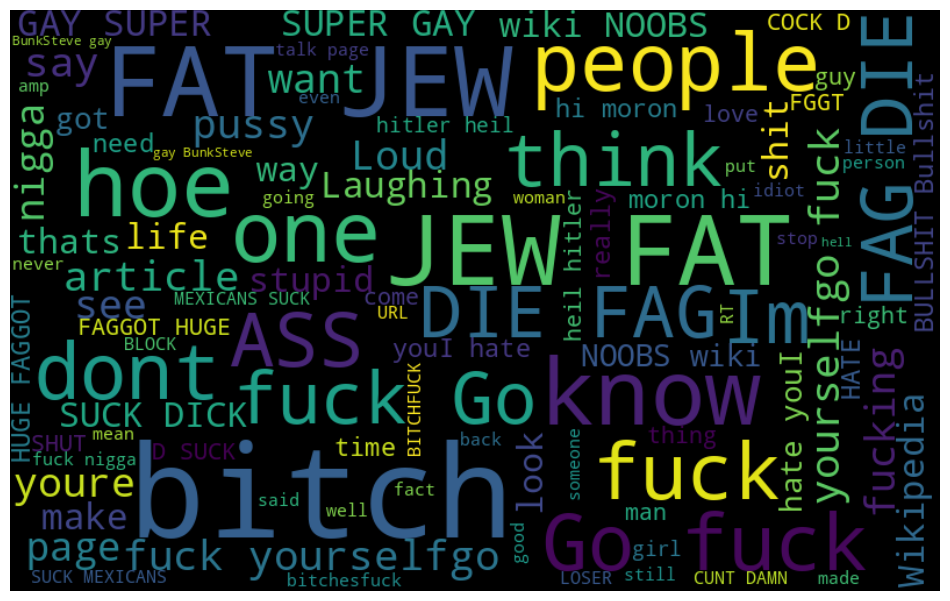

In [118]:
normal_words1 = ' '.join([word for word in data_frame['clean_Text'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words1)
print('Hate words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [119]:
#Collecting positive hashtags

hash_positive = []
hash_negative = []

In [120]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [121]:
data_frame

,Text,label,id,clean_Text,Hash words
1,nah he pussy he won't,1,1,nah pussy wont,No hashtags
2,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me main cause schism Tha...,No hashtags
3,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy clarified intend comment threat rat...,No hashtags
4,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown proper word Better questi...,No hashtags
5,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
...,...,...,...,...,...
94233,", like nonconvex uniform polyhedron",0,94233,like nonconvex uniform polyhedron,No hashtags
94234,`Niggers and their liberal friends steal every...,1,94234,Niggers liberal friend steal everything tied l...,No hashtags
94235,Not into dressin' to impress these bitches or ...,1,94235,Not dressin impress bitch nigga,No hashtags
94236,:Replacement ref - 1UP archive not working? ...,0,94236,Replacement ref UP archive working,No hashtags


In [122]:
hash_positive = hashtag_extract(data_frame['Hash words'][data_frame['label'] == 0])

# extracting hashtags from racist/sexist tweets
hash_negative = hashtag_extract(data_frame['Hash words'][data_frame['label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

In [123]:
q = Counter(hash_positive)
q = dict(q.most_common())

In [124]:
l_positive_count = list(q.values())

In [125]:
l_positive_count[0:4]

[460, 434, 293, 282]

In [126]:
r = Counter(hash_negative)
r = dict(r.most_common())

In [127]:
l_negative_count = list(r.values())

In [128]:
l_negative_count[0:4]

[510, 477, 130, 122]

In [129]:
l_positive_values = list(q.keys())

In [130]:
l_positive_values[0:4]

['MKR', 'mkr', 'FFFFA', 'love']

In [131]:
l_negative_values = list(r.keys())

In [132]:
l_negative_values[0:4]

['MKR', 'mkr', 'notsexist', 'Islam']

In [133]:
l1 = pd.DataFrame(l_positive_values[0:2000],columns = ['Positive_Words'])
l2 = pd.DataFrame(l_positive_count[0:2000],columns = ['Positive_Count'])
l3 = pd.DataFrame(l_negative_values[0:2000],columns = ['Negative_Words'])
l4 = pd.DataFrame(l_negative_count[0:2000],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)
z

,Positive_Words,Positive_Count,Negative_Words,Negative_Count
0,MKR,460,MKR,510
1,mkr,434,mkr,477
2,FFFFA,293,notsexist,130
3,love,282,Islam,122
4,positive,157,trump,120
...,...,...,...,...
1995,typical,1,fpA,1
1996,ladyghostbusters,1,noafd,1
1997,announcement,1,nopegida,1
1998,amilewalk,1,populism,1


In [134]:
z.head(20)

,Positive_Words,Positive_Count,Negative_Words,Negative_Count
0,MKR,460,MKR,510
1,mkr,434,mkr,477
2,FFFFA,293,notsexist,130
3,love,282,Islam,122
4,positive,157,trump,120
5,fdffe,155,allahsoil,89
6,smile,113,fdffe,74
7,fceb,86,NotSexist,72
8,fun,82,Dive_Right_In_AwardURL,72
9,summer,80,fceb,63


In [135]:
remove_word = ["MKR","mkr","fdffe","FDFFE","FFFFFF","Dive_Right_In_AwardURL","FFFFA","fceb","tcot",]
z = z[~z['Positive_Words'].str.contains('|'.join(remove_word), case=False) & ~z['Negative_Words'].str.contains('|'.join(remove_word), case=False)]

In [136]:
z = z.reset_index()

In [137]:
z.head(20)

,index,Positive_Words,Positive_Count,Negative_Words,Negative_Count
0,3,love,282,Islam,122
1,4,positive,157,trump,120
2,10,healthy,79,iphone,47
3,12,thankful,79,android,45
4,13,life,77,ipad,45
5,14,blog,75,sex,45
6,15,fathersday,72,xxx,45
7,16,cute,69,WomenAgainstFeminism,41
8,18,i_am,64,hate,32
9,19,weekend,63,QuestionsForMen,31


In [138]:
# Get positive and negative words and their counts
positive_words = z['Positive_Words']
positive_counts = z['Positive_Count']
negative_words = z['Negative_Words']
negative_counts = z['Negative_Count']

# Create WordCloud for positive words
positive_wordcloud = WordCloud(width=800, height=500, max_font_size=110, max_words=100).generate_from_frequencies(dict(zip(positive_words, positive_counts)))

# Create WordCloud for negative words
negative_wordcloud = WordCloud(width=800, height=500, max_font_size=110, max_words=100).generate_from_frequencies(dict(zip(negative_words, negative_counts)))

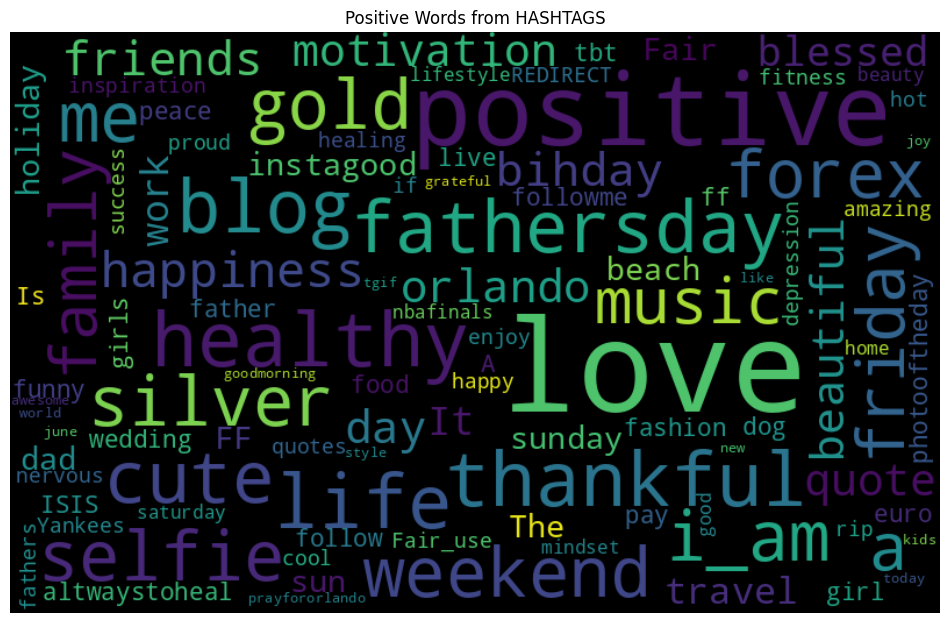

In [139]:
# Plot the positive word cloud
plt.figure(figsize=(12, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear', cmap='viridis')
plt.title('Positive Words from HASHTAGS')
plt.axis('off')
plt.show()

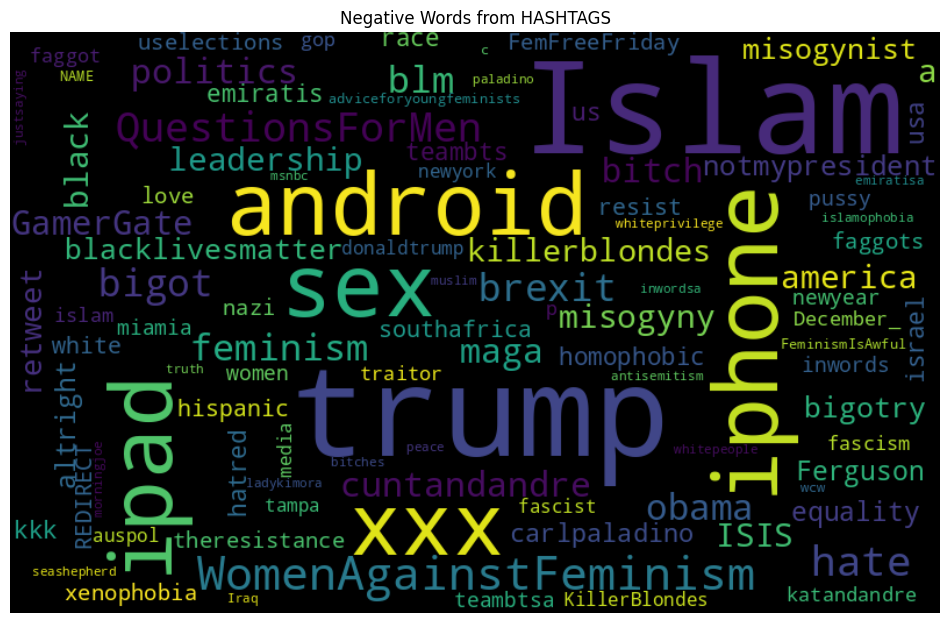

In [140]:
# Plot the negative word cloud
plt.figure(figsize=(12, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear', cmap='viridis')
plt.title('Negative Words from HASHTAGS')
plt.axis('off')
plt.show()

In [ ]:
data_frame[(data_frame['Hash words'] == '#MKR') & (data_frame['label'] == 1)]

,Text,label,id,clean_Text,Hash words
49,RT @Former_legend: That kitchen looks like th...,1,49,RT That kitchen look like theyve reenacted Gir...,#MKR
220,Tonight's #MKR confirms the casting people tr...,1,220,Tonights MKR confirms casting people trawl dar...,#MKR
411,Kat and Annie are their lap dogs are going to ...,1,411,Kat Annie lap dog going sudden death ! MKR .,#MKR
818,"Kat is just plain, fucking awful #MKR",1,818,"Kat plain , fucking awful MKR .",#MKR
1190,They are really proving they are dumb blondes ...,1,1190,They really proving dumb blonde MKR .,#MKR
...,...,...,...,...,...
93347,Oh look get the vacuum there's crumbs on that ...,1,93347,Oh look get vacuum there crumb plate need suck...,#MKR
93839,@mykitchenrules #MKR The girls are bringing ...,1,93839,MKR The girl bringing Sassyges table .,#MKR
93871,Zebra undies #MKR chic in pink dress,1,93871,Zebra undies MKR chic pink dress .,#MKR
94194,"""Do you think the other teams are going to pic...",1,94194,Do think team going pick pretty girl tonight ?...,#MKR


In [ ]:
data_frame[(data_frame['Hash words'] == '#MKR') & (data_frame['label'] == 0)]

,Text,label,id,clean_Text,Hash words
61,😡😡 Damit!! That sucks #MKR,0,61,Damit ! ! That suck MKR .,#MKR
268,The judges are scoring strategically to get Ka...,0,268,The judge scoring strategically get Kat sight ...,#MKR
360,RT @AshleyBellamy_: Katie and Nikki need to b...,0,360,RT Katie Nikki need deported australia MKR .,#MKR
747,"wait, their dessert is custard and floating me...",0,747,"wait , dessert custard floating meringue ? Tha...",#MKR
897,Yes! Get rid of Kat! #MKR,0,897,Yes ! Get rid Kat ! MKR .,#MKR
...,...,...,...,...,...
93103,RT @jameslikesowls: Elephants coming at ya? W...,0,93103,RT Elephants coming ya ? Watch probably Celine...,#MKR
93364,"Colin: ""make moine a dooble."" #MKR",0,93364,Colin make moine dooble . MKR .,#MKR
93469,Can someone smash that bottle of Rose &amp; Li...,0,93469,Can someone smash bottle Rose amp Lime Cordial...,#MKR
93695,#MKR @FourinHand classic Colin. Crime agains...,0,93695,MKR classic Colin . Crime cooking . Hahaha .,#MKR


In [141]:
normal_words1

Output hidden; open in https://colab.research.google.com to view.

In [150]:
word_freq = pd.Series(normal_words1.split()).value_counts()

# Create a DataFrame from word frequencies
df_wordcloud1 = pd.DataFrame({'Hate Words': word_freq.index, 'Frequency': word_freq.values})

In [151]:
df_wordcloud1

,Hate Words,Frequency
0,I,33745
1,YOU,16831
2,You,16237
3,bitch,12542
4,fuck,9058
...,...,...
72248,LANGCHIAO,1
72249,JUNIOR,1
72250,HUMA,1
72251,RYEOWOOKS,1


In [152]:
dff_wordcloud1 = df_wordcloud1.iloc[:114]

In [153]:
dff_wordcloud1 = dff_wordcloud1.reset_index(drop=True)

In [154]:
dff_wordcloud1.head(20)

,Hate Words,Frequency
0,I,33745
1,YOU,16831
2,You,16237
3,bitch,12542
4,fuck,9058
5,like,8199
6,FUCK,5912
7,SUCK,5793
8,as,5659
9,dont,5417


In [155]:
remove_words = ["YOU","you","You","Im","like","...","as","A","THE","know","The","IS","MY","I"]
dff_wordcloud1 = dff_wordcloud1[~dff_wordcloud1['Hate Words'].isin(remove_words)]

In [156]:
dff_wordcloud1

,Hate Words,Frequency
3,bitch,12542
4,fuck,9058
6,FUCK,5912
7,SUCK,5793
9,dont,5417
...,...,...
109,Why,1301
110,cock,1295
111,It,1276
112,HUGE,1270


In [157]:
data_frame

,Text,label,id,clean_Text,Hash words
1,nah he pussy he won't,1,1,nah pussy wont,No hashtags
2,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,My dear Heresiarchess Me main cause schism Tha...,No hashtags
3,` :Warriorboy85 has clarified that he did not...,0,3,Warriorboy clarified intend comment threat rat...,No hashtags
4,` == English == Is ``shootdown`` a proper wo...,0,4,English Is shootdown proper word Better questi...,No hashtags
5,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop Archives TOC,No hashtags
...,...,...,...,...,...
94233,", like nonconvex uniform polyhedron",0,94233,like nonconvex uniform polyhedron,No hashtags
94234,`Niggers and their liberal friends steal every...,1,94234,Niggers liberal friend steal everything tied l...,No hashtags
94235,Not into dressin' to impress these bitches or ...,1,94235,Not dressin impress bitch nigga,No hashtags
94236,:Replacement ref - 1UP archive not working? ...,0,94236,Replacement ref UP archive working,No hashtags


In [158]:
#Converting all text to lower case
data_frame['clean_Text'] = data_frame['clean_Text'].str.lower()

In [160]:
data_frame.head(20)

,Text,label,id,clean_Text,Hash words
1,nah he pussy he won't,1,1,nah pussy wont,No hashtags
2,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,my dear heresiarchess me main cause schism tha...,No hashtags
3,` :Warriorboy85 has clarified that he did not...,0,3,warriorboy clarified intend comment threat rat...,No hashtags
4,` == English == Is ``shootdown`` a proper wo...,0,4,english is shootdown proper word better questi...,No hashtags
5,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop archives toc,No hashtags
6,` :I have reverted this move. The discussion ...,0,6,i reverted move the discussion announced artic...,No hashtags
7,== Image:Josh_hutcherson.jpg listed for dele...,0,7,imagejoshhutchersonjpg listed deletion an imag...,No hashtags
8,Bum bitch won't even my type,1,8,bum bitch wont even type,No hashtags
9,"I know Eagles is NOT guilty of this, but oth...",0,9,i know eagles not guilty user guilty,No hashtags
10,"|royalty-work-group=yes |listas=Juan, Infante...",0,10,royaltyworkgroupyes listasjuan infante count b...,No hashtags


In [161]:
data_frame.to_csv('/content/drive/MyDrive/HATE_SPEECH_DETECTION_PROJECT/DATASET/Lemmatized_Clean_dataset.csv')

In [ ]:
#data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Clean_dataset.csv')

In [ ]:
#num_nan_rows = data_frame.isna().any(axis=1).sum()
#print(num_nan_rows)

0


In [ ]:
#data_frame = data_frame.dropna()

In [ ]:
#data_frame

,Unnamed: 0,Text,label,id,clean_Text,Hash words
0,1,@muslimanarchist @Tobin_Maker @MaxBlumenthal ...,1,1,No the murdering Hamaz head choppers torture c...,No hashtags
1,2,"""are you blind, it says alberto del rio""",1,2,are you blind it says alberto del rio,No hashtags
2,3,Makes sense. The Darwin's Black Box section ...,0,3,Makes sense The Darwins Black Box section on t...,No hashtags
3,4,Please do not interfere in my affair. Mind y...,1,4,Please do not interfere in my affair Mind your...,No hashtags
4,5,.@zBruceey @scarmichael18 Well...I'd bet on th...,1,5,zBruceey WellId bet on the latter URL HERE,No hashtags
...,...,...,...,...,...,...
99995,99996,"I've done nothing wrong, I commented that he...",0,99996,Ive done nothing wrong I commented that he was...,No hashtags
99996,99997,BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALL...,1,99997,BALLS BA,No hashtags
99997,99998,== Important == do you spit or swallow?,1,99998,Important do you spit or swallow,No hashtags
99998,99999,` *I don't think a section about racism needs...,0,99999,I dont think a section about racism needs to b...,No hashtags


In [ ]:
#data_frame['clean_Text'].dtype

dtype('O')

In [ ]:
#Animated plot for positive words with their frequency
fig = px.bar(z, x="Positive_Words", y="Positive_Count",animation_frame="Positive_Count",
            hover_name="Positive_Words")

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[dict(
                label="Play",
                method="animate",
                args=[None, {"frame": {"duration": 1200, "redraw": True},
                             "fromcurrent": True, "transition": {"duration": 0}}],
            )]
        )
    ])

fig.show()

In [ ]:
# Animated plot for negative words with their frequency
fig = px.bar(z, x="Negative_Words", y="Negative_Count",animation_frame="Negative_Count",
            hover_name="Negative_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [ ]:
#Normal histogram of positive words
fig = px.bar(z, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()

In [ ]:
#Normal histogram of negative words
fig = px.bar(z, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

In [ ]:
#Normal histogram of Hate words from the data
fig = px.bar(dff_wordcloud1, x="Hate Words", y="Frequency",
            hover_name="Hate Words",color= 'Hate Words')
fig.show()